In [1]:
! git clone https://github.com/hongtienhaolk2001/Graduate_Thesis.git
%cd /content/Graduate_Thesis/train
!pip install -r requirements.txt

Cloning into 'Graduate_Thesis'...
remote: Enumerating objects: 1135, done.
remote: Counting objects: 100% (343/343), done.
remote: Compressing objects: 100% (217/217), done.
remote: Total 1135 (delta 179), reused 251 (delta 105), pack-reused 792
Receiving objects: 100% (1135/1135), 64.63 MiB | 27.96 MiB/s, done.
Resolving deltas: 100% (462/462), done.
/content/Graduate_Thesis/train
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.5 MB/s eta 0:00:00
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645932 sha256=9ae2a61a42d9049c6920fc3d9b2c67103eb7230bc32d9b73a0f441c66a3ea87c
  Stored in directory: /root/.cache/pip/wheels/5d/d9/b3/41f6c6b1ab758561fd4aab55dc0480b9d

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from datasets import load_dataset
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, DataCollatorWithPadding
from vncorenlp import VnCoreNLP
from model.Model_1 import CustomModel
from preprocessing.NewsPreprocessing import Preprocess
from Trainer_1 import Trainer
import matplotlib.pyplot as plt
from visualize import *

In [3]:
rdrsegmenter = VnCoreNLP("preprocessing/vncorenlp/VnCoreNLP-1.1.1.jar",
                          annotators="wseg", max_heap_size='-Xmx500m')
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")
preprocess = Preprocess(tokenizer, rdrsegmenter)
data_files = {'train': r"./data/training_data/train_datasets.csv",
              'test': r"./data/training_data/test_datasets.csv"}
tokenized_datasets = preprocess.run(load_dataset('csv', data_files=data_files))
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
train_dataloader = DataLoader(tokenized_datasets["train"], batch_size=32, collate_fn=data_collator, shuffle=True)
valid_dataloader = DataLoader(tokenized_datasets["test"], batch_size=32, collate_fn=data_collator)
trainer = Trainer(model=CustomModel("vinai/phobert-base"),
                  train_dataloader=train_dataloader,
                  valid_dataloader=valid_dataloader, )
train_f1_viz, eval_f1_viz, train_loss_viz, eval_loss_viz = trainer.training()

config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/3190 [00:00<?, ? examples/s]

Map:   0%|          | 0/354 [00:00<?, ? examples/s]

Map:   0%|          | 0/3190 [00:00<?, ? examples/s]

Map:   0%|          | 0/354 [00:00<?, ? examples/s]

Map:   0%|          | 0/3190 [00:00<?, ? examples/s]

Map:   0%|          | 0/354 [00:00<?, ? examples/s]

Map:   0%|          | 0/3190 [00:00<?, ? examples/s]

Map:   0%|          | 0/354 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/content/Graduate_Thesis/train/metrics.py:25: RuntimeWarning: invalid value encountered in divide
  return TP / (TP + FP)


update model with score 0.2642353200247313
-----------------------------------------------------------
| End of epoch   1 | Time: 58.05s | Train F1    0.278 | Train Loss    3.270 | Valid F1    0.264 | Valid Loss    1.039 
-----------------------------------------------------------
update model with score 0.280974043350281
-----------------------------------------------------------
| End of epoch   2 | Time: 52.47s | Train F1    0.257 | Train Loss    3.033 | Valid F1    0.281 | Valid Loss    1.046 
-----------------------------------------------------------
update model with score 0.573577158348121
-----------------------------------------------------------
| End of epoch   3 | Time: 53.13s | Train F1    0.449 | Train Loss    2.639 | Valid F1    0.574 | Valid Loss    0.905 
-----------------------------------------------------------
update model with score 0.6174688804267986
-----------------------------------------------------------
| End of epoch   4 | Time: 56.18s | Train F1    0.619

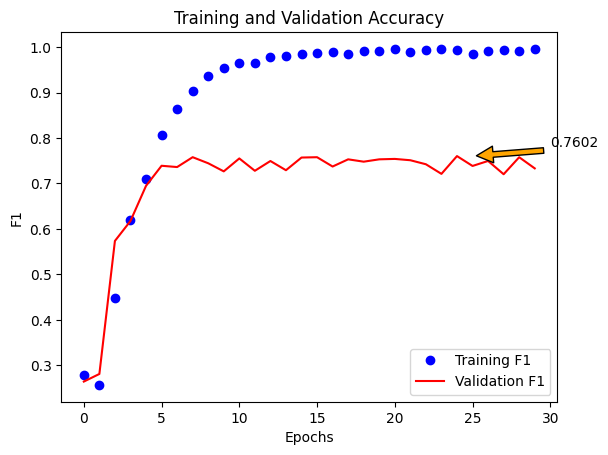

In [27]:
visualize_metric(train_f1_viz,  eval_f1_viz, epochs=30)

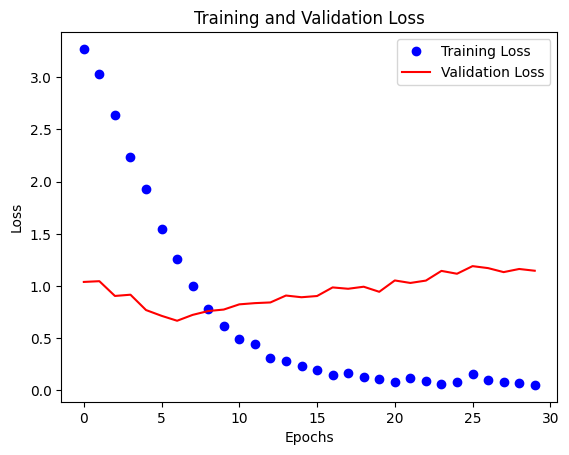

In [31]:
eval_loss_viz = [float(t.cuda()) for t in eval_loss_viz]
train_loss_viz = [float(t.cuda()) for t in train_loss_viz]
visualize_losses(train_loss_viz, eval_loss_viz, epochs=30)